# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

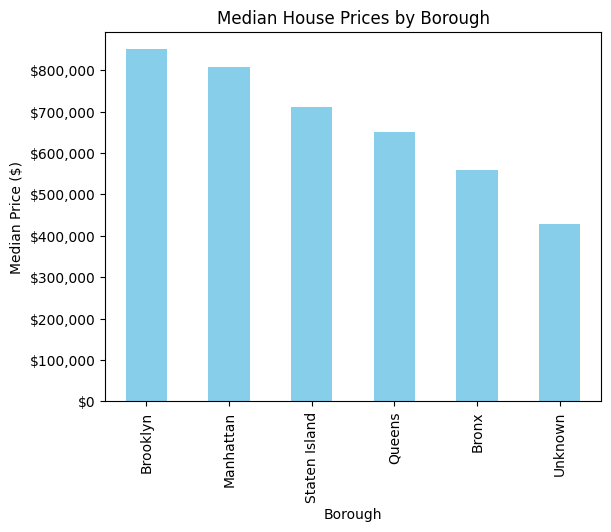

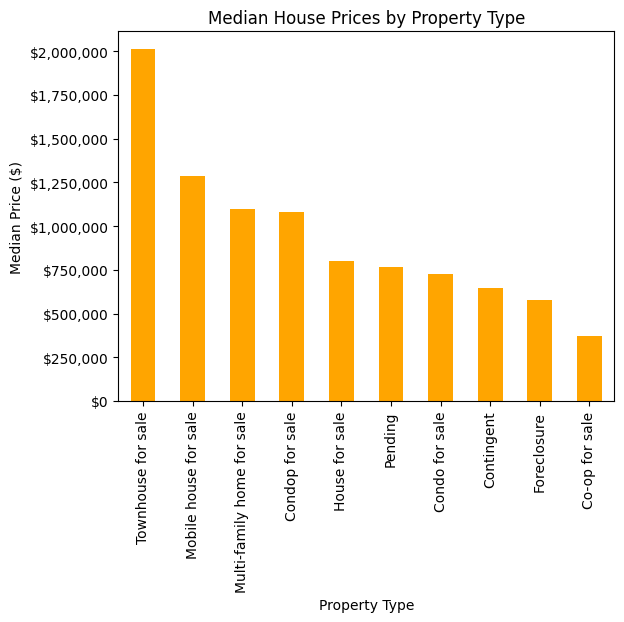

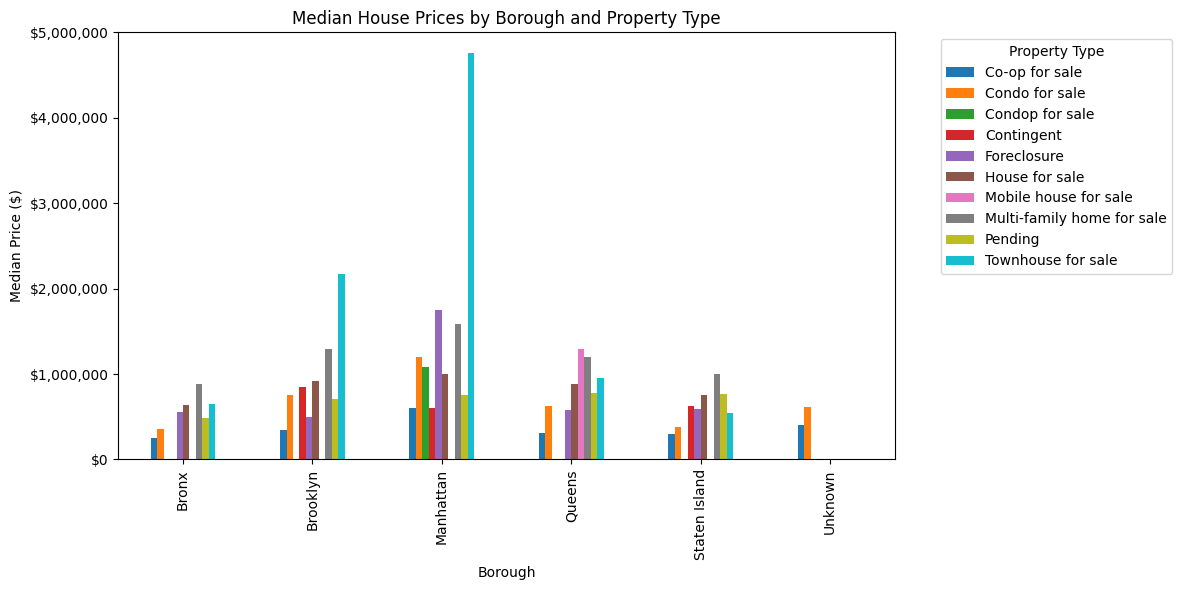

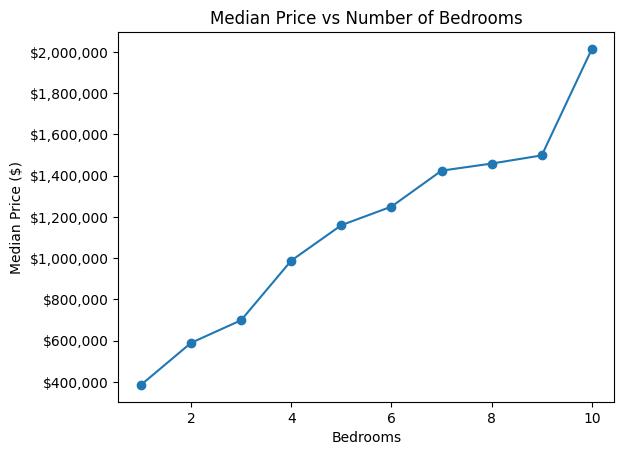

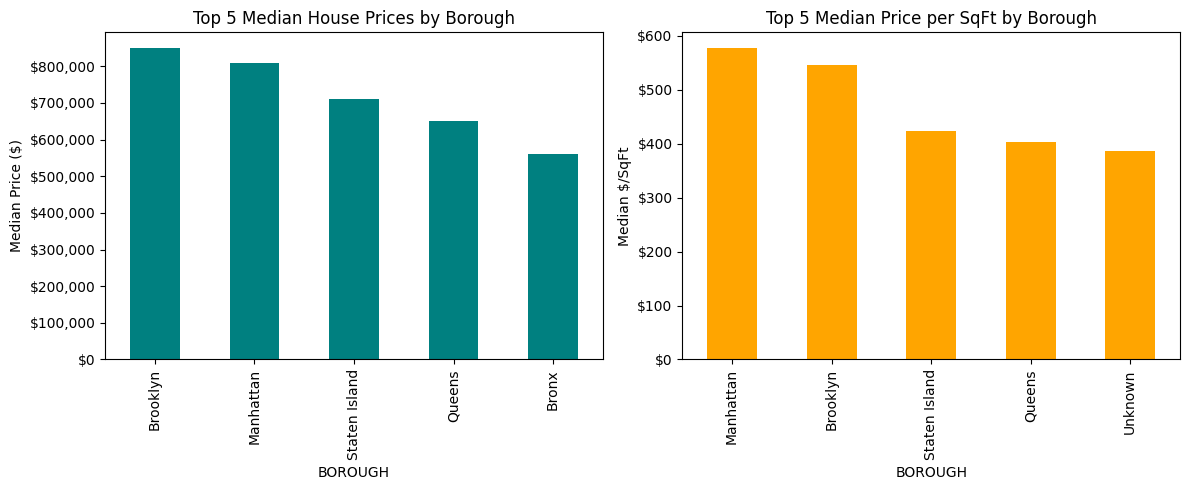

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NY-House-Dataset.csv")
df = df.drop(304)

# BOROUGH mapping
borough_map = {
    "Kings County": "Brooklyn", 'Brooklyn': 'Brooklyn',
    'Queens County': 'Queens', 'Queens': 'Queens',
    'New York County': 'Manhattan', 'Manhattan': 'Manhattan', 'New York': 'Manhattan',
    'Richmond County': 'Staten Island', 'Staten Island': 'Staten Island',
    'Bronx County': 'Bronx', 'The Bronx': 'Bronx'
}
df["BOROUGH"] = df["SUBLOCALITY"].map(borough_map)
df["BOROUGH"] = df["BOROUGH"].fillna("Unknown")

# Remove irrelevant types
df = df[~df["TYPE"].isin(["Land for sale", "Coming Soon", "For sale"])]

# Drop unnecessary columns
df = df.drop(columns=["ADDRESS", "STATE", "SUBLOCALITY", "LOCALITY", "MAIN_ADDRESS",
                      "ADMINISTRATIVE_AREA_LEVEL_2", "LONG_NAME", "STREET_NAME", "FORMATTED_ADDRESS"])

df = df[["BOROUGH", "BROKERTITLE", "TYPE", "PRICE", "BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]

# Filter unrealistic BEDS/BATH
df = df[df["BEDS"] <= 10]
df = df[df["BATH"] <= 10]

# TYPE bazlı aşırı uç filtre (median * 3)
df = df[df.apply(lambda row: row["PRICE"] <= df.groupby("TYPE")["PRICE"].transform("median")[row.name] * 3, axis=1)]

# Manhattan Co-op özel filtre
df = df[~((df["BOROUGH"]=="Manhattan") & (df["TYPE"]=="Co-op for sale") & (df["PRICE"]>3_000_000))]

# Median by BOROUGH
median_prices = df.groupby("BOROUGH")["PRICE"].median().sort_values(ascending=False)
median_prices.plot(kind="bar", color="skyblue")
plt.title("Median House Prices by Borough")
plt.ylabel("Median Price ($)")
plt.xlabel("Borough")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.show()

# Median by TYPE
median_type_prices = df.groupby("TYPE")["PRICE"].median().sort_values(ascending=False)
median_type_prices.plot(kind="bar", color="orange")
plt.title("Median House Prices by Property Type")
plt.ylabel("Median Price ($)")
plt.xlabel("Property Type")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.show()

# Median by BOROUGH + TYPE
median_prices = df.groupby(["BOROUGH","TYPE"])["PRICE"].median().unstack()
median_prices.plot(kind="bar", figsize=(12,6))
plt.title("Median House Prices by Borough and Property Type")
plt.ylabel("Median Price ($)")
plt.xlabel("Borough")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Median by BEDS
median_beds = df.groupby("BEDS")["PRICE"].median()
median_beds.plot(kind="line", marker="o")
plt.title("Median Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Median Price ($)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.show()

# ---- EK: En pahalı 5 BOROUGH ve metrekare başı fiyat ----
df = df[df["PROPERTYSQFT"] > 0]  # metrekare 0 olanları çıkar
df["PRICE_PER_SQFT"] = df["PRICE"] / df["PROPERTYSQFT"]

top5_borough_price = df.groupby("BOROUGH")["PRICE"].median().nlargest(5)
top5_borough_sqft = df.groupby("BOROUGH")["PRICE_PER_SQFT"].median().nlargest(5)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
top5_borough_price.plot(kind="bar", color="teal", title="Top 5 Median House Prices by Borough")
plt.ylabel("Median Price ($)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.subplot(1,2,2)
top5_borough_sqft.plot(kind="bar", color="orange", title="Top 5 Median Price per SqFt by Borough")
plt.ylabel("Median $/SqFt")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.show()
